In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path



# Specify encoding when reading the CSV files
# Common encodings to try: 'latin1', 'ISO-8859-1', 'cp1252'
df = pd.read_csv('../data/raw/health_impact_2025.csv')

df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [4]:
df.index

RangeIndex(start=0, stop=3157, step=1)

In [5]:
df.columns
print(df.columns)

Index(['Survey_Date', 'Age', 'Gender', 'Region', 'Industry', 'Job_Role',
       'Work_Arrangement', 'Hours_Per_Week', 'Mental_Health_Status',
       'Burnout_Level', 'Work_Life_Balance_Score', 'Physical_Health_Issues',
       'Social_Isolation_Score', 'Salary_Range'],
      dtype='object')


In [6]:
df.duplicated().sum()
df.isna().sum()

Survey_Date                  0
Age                          0
Gender                       0
Region                       0
Industry                     0
Job_Role                     0
Work_Arrangement             0
Hours_Per_Week               0
Mental_Health_Status       799
Burnout_Level                0
Work_Life_Balance_Score      0
Physical_Health_Issues     280
Social_Isolation_Score       0
Salary_Range                 0
dtype: int64

In [7]:
def clean_all_columns(df):
    # Import numpy for NaN values
    import numpy as np
    
    # Loop through all columns in the dataframe
    for column in df.columns:
        # Convert column to string type
        df[column] = df[column].astype(str)
        # Strip whitespace and convert to uppercase
        df[column] = df[column].str.strip().str.upper()
        # Replace column name with NaN (assuming column names might be in the data)
        df[column] = df[column].replace(column.upper(), np.nan)
        # Also replace 'NAN' string with actual NaN value
        df[column] = df[column].replace('NAN', np.nan)
    
    return df

# Clean all columns
df = clean_all_columns(df)

# Example of checking unique values in a specific column


In [9]:
print(sorted(df['Job_Role'].dropna().unique()))

['ACCOUNT MANAGER', 'BUSINESS ANALYST', 'CONSULTANT', 'CONTENT WRITER', 'CUSTOMER SERVICE MANAGER', 'DATA ANALYST', 'DATA SCIENTIST', 'DEVOPS ENGINEER', 'DIGITAL MARKETING SPECIALIST', 'EXECUTIVE ASSISTANT', 'FINANCIAL ANALYST', 'HR MANAGER', 'IT SUPPORT', 'MARKETING SPECIALIST', 'OPERATIONS MANAGER', 'PRODUCT MANAGER', 'PROJECT MANAGER', 'QUALITY ASSURANCE', 'RESEARCH SCIENTIST', 'SALES REPRESENTATIVE', 'SOCIAL MEDIA MANAGER', 'SOFTWARE ENGINEER', 'TECHNICAL WRITER', 'UX DESIGNER']


In [10]:
print(sorted(df['Mental_Health_Status'].dropna().unique()))

['ADHD', 'ANXIETY', 'BURNOUT', 'DEPRESSION', 'PTSD', 'STRESS DISORDER']


In [11]:
print(sorted(df['Work_Life_Balance_Score'].dropna().unique()))

['1', '2', '3', '4', '5']


In [12]:
print(sorted(df['Physical_Health_Issues'].dropna().unique()))

['BACK PAIN', 'BACK PAIN; EYE STRAIN', 'BACK PAIN; EYE STRAIN; NECK PAIN', 'BACK PAIN; EYE STRAIN; NECK PAIN; WRIST PAIN', 'BACK PAIN; EYE STRAIN; WRIST PAIN', 'BACK PAIN; NECK PAIN', 'BACK PAIN; NECK PAIN; WRIST PAIN', 'BACK PAIN; SHOULDER PAIN', 'BACK PAIN; SHOULDER PAIN; EYE STRAIN', 'BACK PAIN; SHOULDER PAIN; EYE STRAIN; NECK PAIN', 'BACK PAIN; SHOULDER PAIN; EYE STRAIN; NECK PAIN; WRIST PAIN', 'BACK PAIN; SHOULDER PAIN; EYE STRAIN; WRIST PAIN', 'BACK PAIN; SHOULDER PAIN; NECK PAIN', 'BACK PAIN; SHOULDER PAIN; NECK PAIN; WRIST PAIN', 'BACK PAIN; SHOULDER PAIN; WRIST PAIN', 'BACK PAIN; WRIST PAIN', 'EYE STRAIN', 'EYE STRAIN; NECK PAIN', 'EYE STRAIN; NECK PAIN; WRIST PAIN', 'EYE STRAIN; WRIST PAIN', 'NECK PAIN', 'NECK PAIN; WRIST PAIN', 'SHOULDER PAIN', 'SHOULDER PAIN; EYE STRAIN', 'SHOULDER PAIN; EYE STRAIN; NECK PAIN', 'SHOULDER PAIN; EYE STRAIN; NECK PAIN; WRIST PAIN', 'SHOULDER PAIN; EYE STRAIN; WRIST PAIN', 'SHOULDER PAIN; NECK PAIN', 'SHOULDER PAIN; NECK PAIN; WRIST PAIN', 'SHO

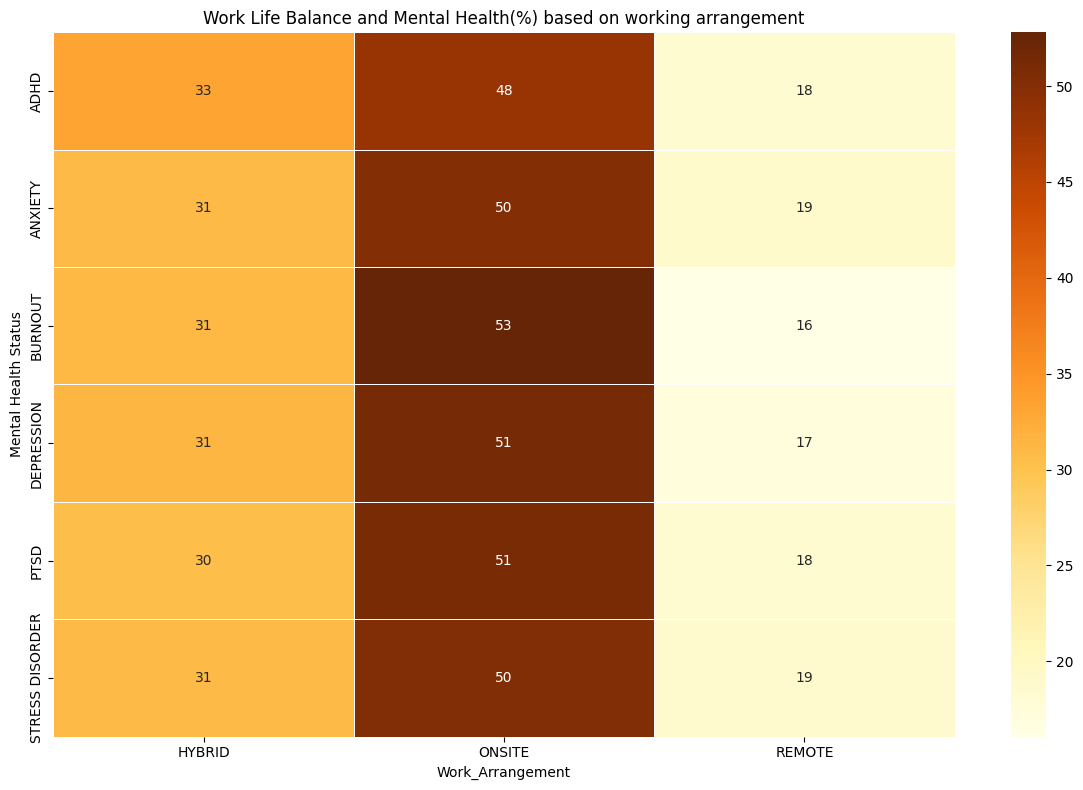

In [19]:
# Assuming df is your DataFrame
# First, let's check if we need to use a different aggregation function or a different value column

# Option 1: If you want to count occurrences instead of calculating median
pivot_exp_country = pd.pivot_table(
    df,
    index='Mental_Health_Status',
    columns='Work_Arrangement',
    values='Work_Life_Balance_Score',
    aggfunc='count'  # Changed from 'median' to 'count'
)

# Option 2: If you have a numeric column to calculate median on, use that instead
# For example, if you have a 'Salary' column:
# pivot_exp_country = pd.pivot_table(
#     df,
#     index='Mental_Health_Status',
#     columns='Work_Life_Balance_Score',
#     values='Salary',  # Changed from 'Work_Arrangement' to a numeric column
#     aggfunc='median'
# ).round(0)

pivot_exp_country = pivot_exp_country.div(pivot_exp_country.sum(axis=1), axis=0) * 100



# Heatmap
fig = plt.figure(figsize=(12, 8))
sns.heatmap(pivot_exp_country,
            annot=True,
            fmt=".0f",
            cmap="YlOrBr",
            linewidths=0.5)
plt.title("Work Life Balance and Mental Health(%) based on working arrangement")
plt.xlabel('Work_Arrangement')
plt.ylabel("Mental Health Status")  # Fixed to match the index used in pivot table
plt.tight_layout()
plt.show()
fig.savefig("Work Life Balance and Mental Health Heatmap.png")  # Updated filename to match content

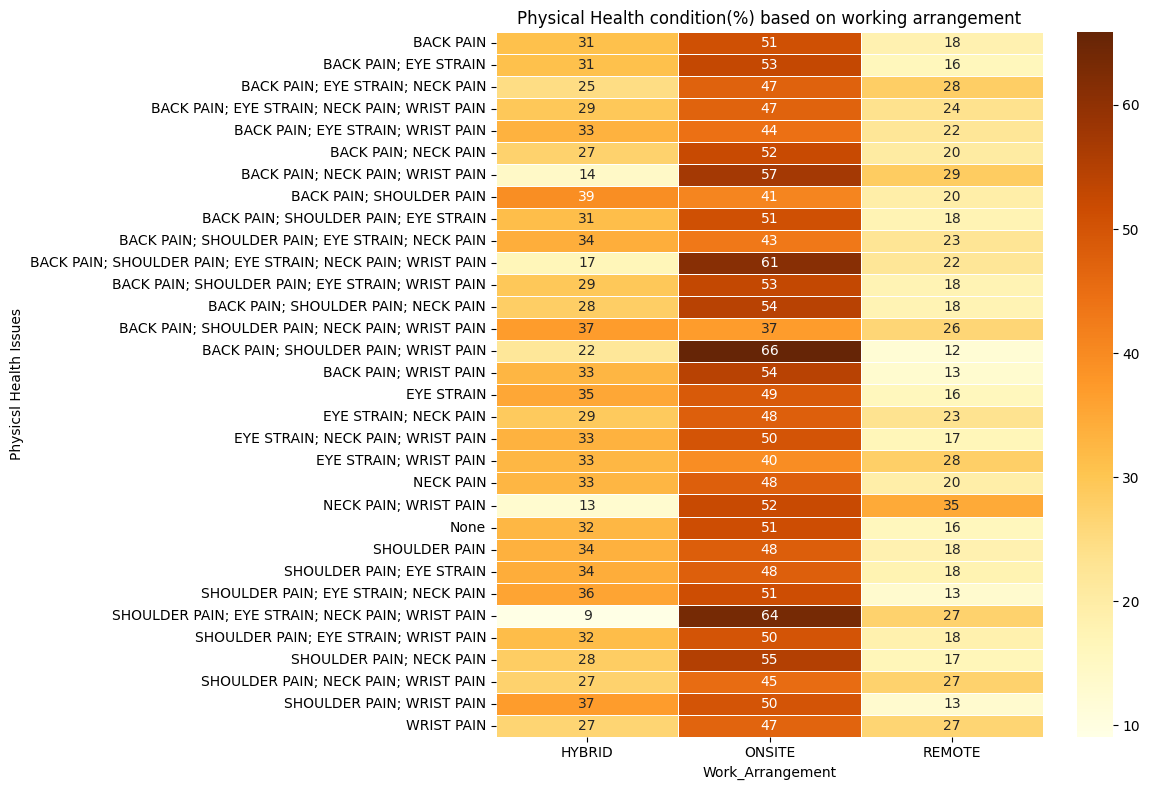

In [41]:
# Assuming df is your DataFrame
# First, let's check if we need to use a different aggregation function or a different value column

# Option 1: If you want to count occurrences instead of calculating median
pivot_exp_country = pd.pivot_table(
    df,
    index='Physical_Health_Issues',
    columns='Work_Arrangement',
    values='Industry',
    aggfunc='count'  # Changed from 'median' to 'count'
)

# Option 2: If you have a numeric column to calculate median on, use that instead
# For example, if you have a 'Salary' column:
# pivot_exp_country = pd.pivot_table(
#     df,
#     index='Mental_Health_Status',
#     columns='Work_Life_Balance_Score',
#     values='Salary',  # Changed from 'Work_Arrangement' to a numeric column
#     aggfunc='median'
# ).round(0)

pivot_exp_country = pivot_exp_country.div(pivot_exp_country.sum(axis=1), axis=0) * 100



# Heatmap
fig = plt.figure(figsize=(12, 8))
sns.heatmap(pivot_exp_country,
            annot=True,
            fmt=".0f",
            cmap="YlOrBr",
            linewidths=0.5)
plt.title("Physical Health condition(%) based on working arrangement")
plt.xlabel('Work_Arrangement')
plt.ylabel("Physicsl Health Issues")  # Fixed to match the index used in pivot table
plt.tight_layout()
plt.show()
fig.savefig("Physical Health condition based on and working arrangement.png")  # Updated filename to match content

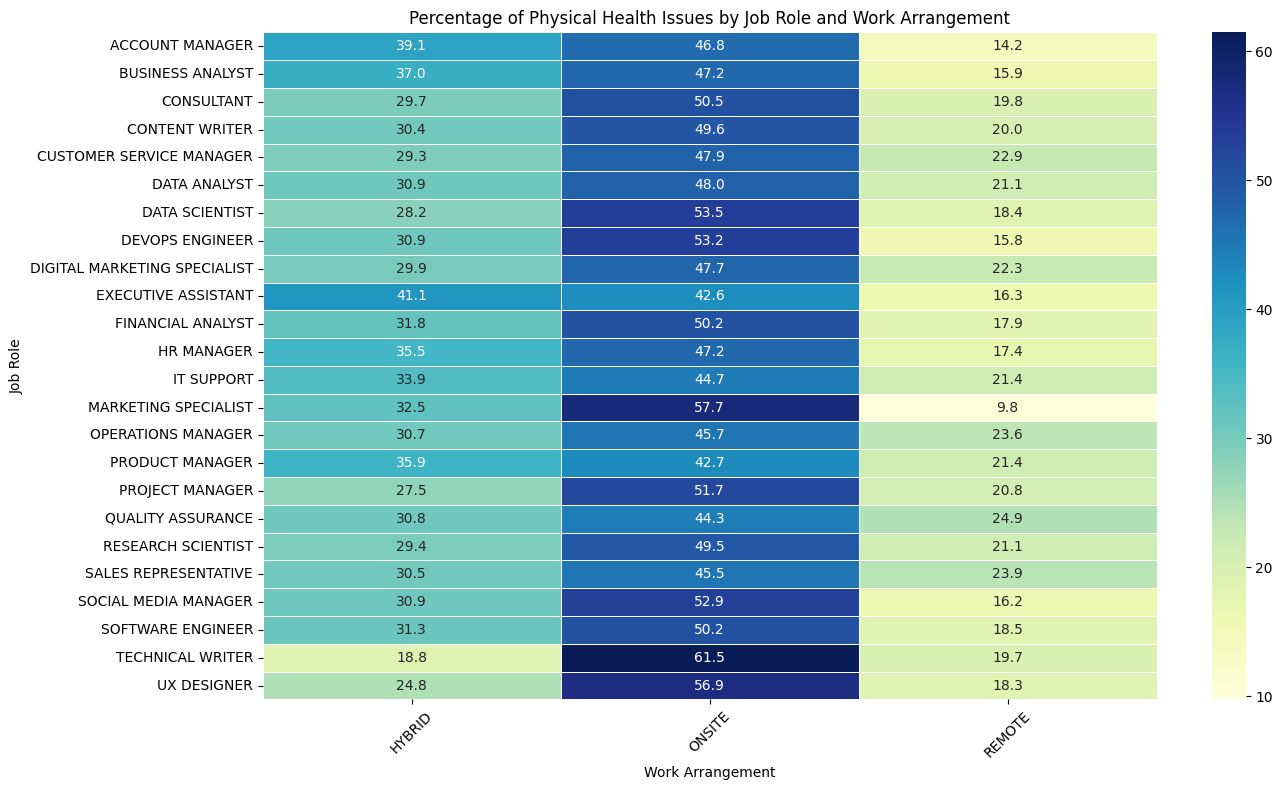

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explode physical health issues into separate rows
df['Physical_Health_Issues'] = df['Physical_Health_Issues'].fillna('None')
df_exploded = df.assign(
    Physical_Health_Issue=df['Physical_Health_Issues'].str.split('; ')
).explode('Physical_Health_Issue')

# Filter out entries with no reported issues
df_exploded = df_exploded[df_exploded['Physical_Health_Issue'] != 'None']

# Group data
pivot_table = df_exploded.groupby(['Job_Role', 'Work_Arrangement', 'Physical_Health_Issue']).size().reset_index(name='Count')

# Pivot for heatmap
heatmap_data = pivot_table.pivot_table(index='Job_Role', columns='Work_Arrangement', values='Count', aggfunc='sum', fill_value=0)

# Optional: Normalize to percentages (row-wise)
heatmap_percent = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

# Plot heatmap as percentage
fig = plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_percent, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5)
plt.title('Percentage of Physical Health Issues by Job Role and Work Arrangement')
plt.xlabel('Work Arrangement')
plt.ylabel('Job Role')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the figure
fig.savefig("physical_health_issues_heatmap_percent.png")
plt.show()

